In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# LOADING THE DATASET

In [8]:
df = pd.read_csv(r"C:\Users\shan2\pandas\Churn.csv")

In [13]:
print('\n Shape of dataset',df.shape)


 Shape of dataset (7043, 21)


# EDA

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
print("\n Describing Dataset Based on Statical terms\n")
df.describe()


 Describing Dataset Based on Statical terms



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
print("\n Dataset Information \n")
df.info()


 Dataset Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [14]:
print("Null values in dataset")
df.isna().sum()[df.isna().sum()>0]

Null values in dataset


Series([], dtype: int64)

In [24]:
for columns in df.columns:
    print({columns : df[columns].unique()})

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)}
{'gender': array(['Female', 'Male'], dtype=object)}
{'SeniorCitizen': array([0, 1], dtype=int64)}
{'Partner': array(['Yes', 'No'], dtype=object)}
{'Dependents': array(['No', 'Yes'], dtype=object)}
{'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)}
{'PhoneService': array(['No', 'Yes'], dtype=object)}
{'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object)}
{'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object)}
{'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object)}
{'OnlineBackup': array(['Yes', 'No', 'No

In [26]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


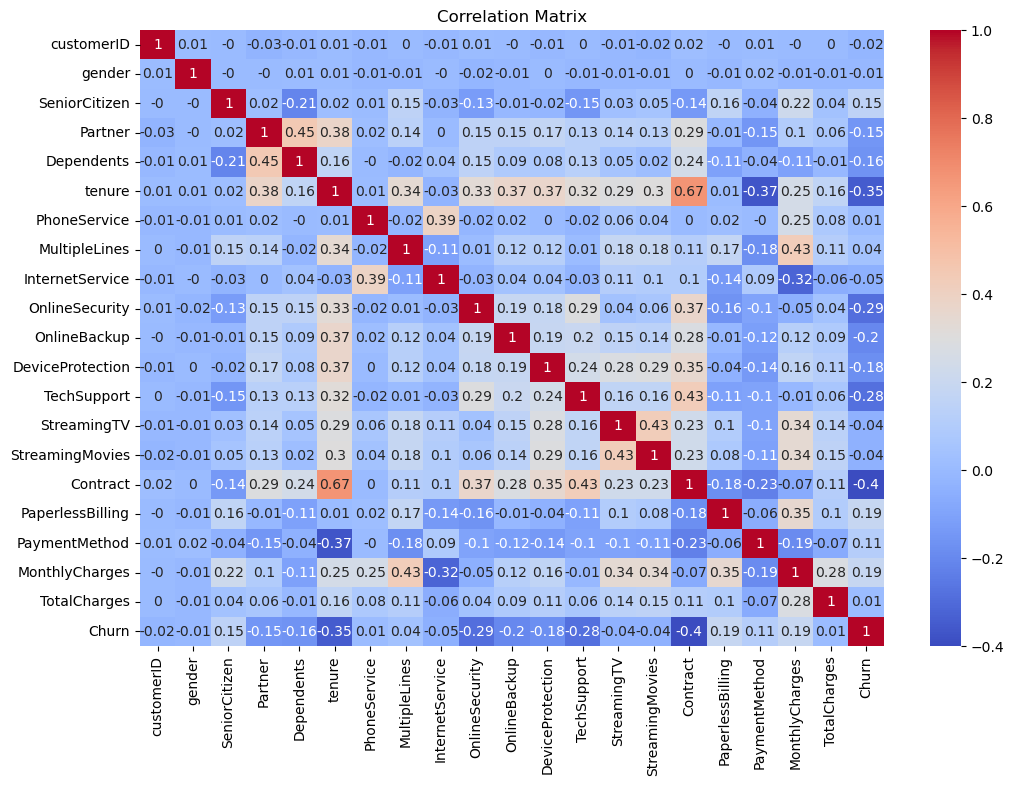

In [63]:
# Check correlation for feature selection
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df.gender.replace({'Male':1 , 'Female':0} , inplace= True)

In [36]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [60]:
# Split the the dataset

In [38]:
X = df.drop(['Churn'] , axis=1)
y = df.Churn

In [40]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=.2)

In [41]:
print("records in train dataset" , x_train.shape[0]+y_train.shape[0])
print("records in test datset ", x_test.shape[0]+y_test.shape[0])

records in train dataset 11268
records in test datset  2818


# Train The Model

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200 ,criterion='entropy', random_state=50)

In [43]:
rf.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=50)

In [44]:
# Feature importance using  Random forest

In [45]:
importance = rf.feature_importances_

In [46]:
feature_imp_table = pd.DataFrame({"Features":x_train.columns , "Importance of Feature":importance})

In [47]:
feature_imp_table.sort_values("Importance of Feature" , ascending=False , inplace=True)
feature_imp_table

,Features,Importance of Feature
5,tenure,0.152067
18,MonthlyCharges,0.146215
19,TotalCharges,0.135598
0,customerID,0.131521
15,Contract,0.084245
17,PaymentMethod,0.044828
9,OnlineSecurity,0.037365
12,TechSupport,0.036892
10,OnlineBackup,0.026834
8,InternetService,0.025050


In [48]:
# inference --> the features are arranged in asc most imp features at first

In [49]:
threshold_value = 0.01
imp_features = feature_imp_table[feature_imp_table['Importance of Feature']>threshold_value].Features

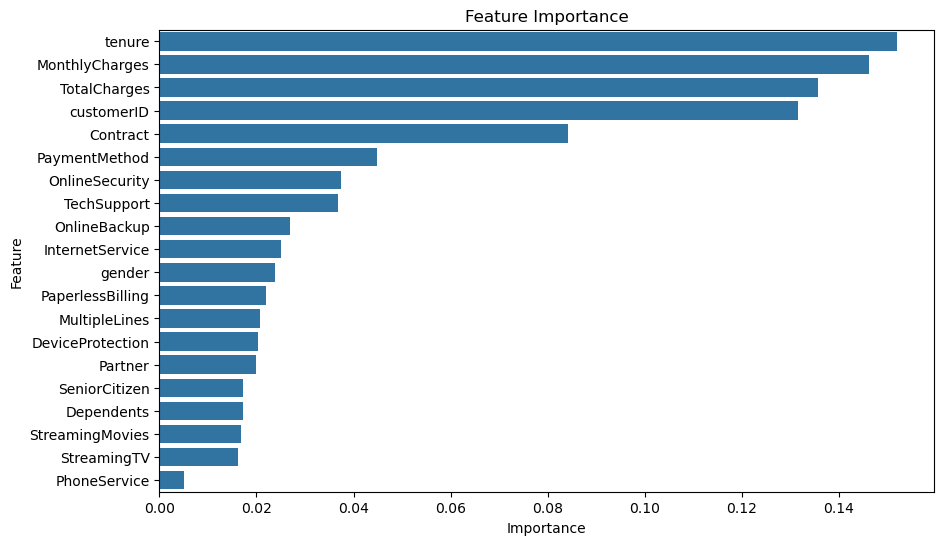

In [61]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp_table['Importance of Feature'], y=feature_imp_table['Features'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [50]:
x_train_selected = x_train[imp_features]
x_test_selected = x_test[imp_features]

In [51]:
# build a random forest model

In [52]:
rf.fit(x_train_selected , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=50)

In [53]:
predict = rf.predict(x_test_selected)

In [54]:
confusion_matrix_tab = confusion_matrix(y_test , predict)
confusion_matrix_tab

array([[948,  99],
       [174, 188]], dtype=int64)

# Results

In [55]:
print('Accuracy:', accuracy_score(y_test, predict))
print('Classification Report:')
print(classification_report(y_test, predict))

Accuracy: 0.8062455642299503
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1047
           1       0.66      0.52      0.58       362

    accuracy                           0.81      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

